In [272]:
import pandas as pd
# Update the file URL to get the raw data from GitHub
file = ('https://raw.githubusercontent.com/SurajSahani-2000/SMS-Spam-Classifier-ML-PROJECT/main/spam.csv')
df = pd.read_csv(file, encoding='latin-1') # Added encoding as it is a common issue with this dataset
df.columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

#**DATA CLEANING**

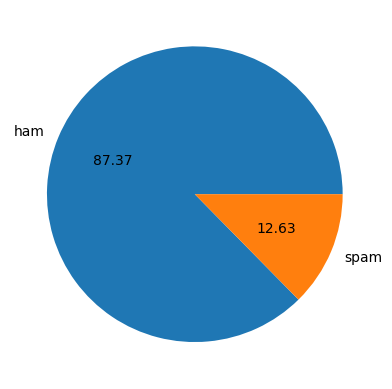

In [283]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [284]:
# Install NLTK if you haven't already
!pip install nltk

In [285]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [286]:
import nltk
nltk.download('punkt') # Required for tokenization and sentence splitting

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [287]:
df['num_character'] = df['text'].apply(len)

In [288]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [289]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
display(df.head())

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [290]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [291]:
df[['num_sentences', 'num_words', 'num_character']].describe()

,num_sentences,num_words,num_character
count,5169.000000,5169.000000,5169.000000
mean,1.965564,15.340685,78.977945
std,1.448541,11.068488,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,7.000000,36.000000
50%,1.000000,12.000000,60.000000
75%,2.000000,22.000000,117.000000
max,38.000000,171.000000,910.000000


In [292]:
df[df['target'] == 0][['num_sentences', 'num_words', 'num_character']].describe()

,num_sentences,num_words,num_character
count,4516.000000,4516.000000,4516.000000
mean,1.820195,14.134632,70.459256
std,1.383657,11.116240,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,7.000000,34.000000
50%,1.000000,11.000000,52.000000
75%,2.000000,18.000000,90.000000
max,38.000000,171.000000,910.000000


In [293]:
df[df['target'] == 1][['num_sentences', 'num_words', 'num_character']].describe()

,num_sentences,num_words,num_character
count,653.000000,653.000000,653.000000
mean,2.970904,23.681470,137.891271
std,1.488425,5.967672,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,22.000000,132.000000
50%,3.000000,25.000000,149.000000
75%,4.000000,28.000000,157.000000
max,9.000000,35.000000,224.000000


<Axes: xlabel='num_character', ylabel='Count'>

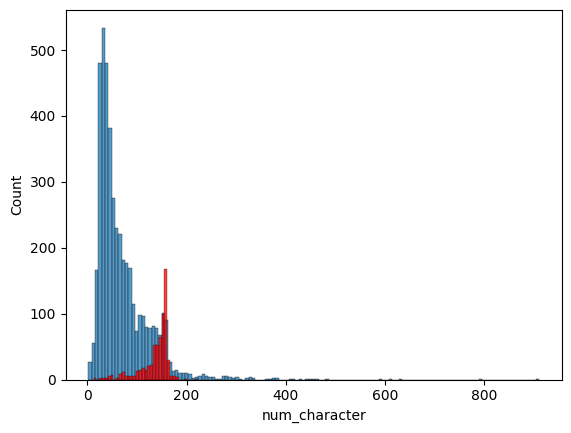

In [294]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

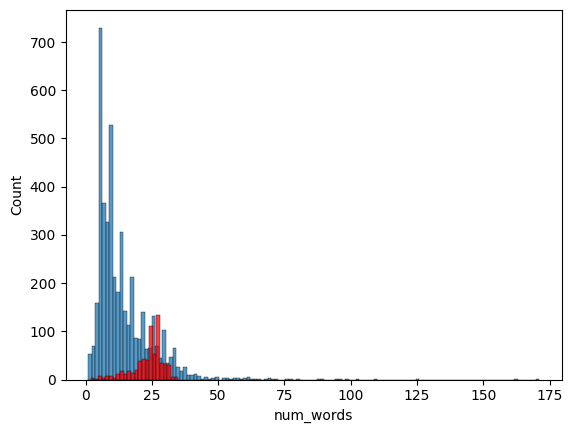

In [295]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

In [296]:
display(df.head())

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


## Data splitting




In [297]:
from sklearn.model_selection import train_test_split

X = df[['num_character', 'num_words', 'num_sentences']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model selection and training



In [298]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

GaussianNB()

## Model evaluation




In [299]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.868522815158546


## Summary:

### Data Analysis Key Findings

*   The DataFrame `df` already contained the engineered features: `num_character`, `num_words`, and `num_sentences`.
*   The data was successfully split into training (75%) and testing (25%) sets, resulting in `X_train` (4179 samples), `X_test` (1393 samples), `y_train` (4179 samples), and `y_test` (1393 samples).
*   A Gaussian Naive Bayes model was successfully instantiated and trained on the training data using the engineered features.
*   The trained Naive Bayes model achieved an accuracy of approximately 86.85% on the test set.

### Insights or Next Steps

*   Consider evaluating other classification models (e.g., Logistic Regression, Support Vector Machines) to compare performance against the Naive Bayes model.
*   Investigate other evaluation metrics like precision, recall, and F1-score to get a more comprehensive understanding of the model's performance, especially concerning potential class imbalance.
